<a href="https://colab.research.google.com/github/mjennings061/ai_hack_for_good_2020/blob/mj/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team RuntimeError

Based on https://www.opendatani.gov.uk/dataset/police-recorded-injury-road-traffic-collision-statistics-northern-ireland-2018

**Initialisation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import folium
import json

**Functions**

In [2]:
#  THIS FUNCTION WILL DISPAY A MARKER AT A GIVEN LOCATION

def vehicle_marker_maker(init=0,location = [54.637676, -6.645536],color="gray",v_type=0,popup_txt=""):

  # folium colors: ‘red’, ‘blue’, ‘green’, ‘purple’, ‘orange’, ‘darkred’,’lightred’, ‘beige’, ‘darkblue’, ‘darkgreen’, ‘cadetblue’, ‘darkpurple’, ‘white’, ‘pink’, ‘lightblue’, ‘lightgreen’, ‘gray’, ‘black’, ‘lightgray’
  
  # no 3 missing, this data is incomplete
  vehicle_lookup={
    'NaN':"Unknown",
    0:"Unknown",
    1:"Pedal cycle",
    2:"Motorcycle - moped",
    4:"Motorcycle (under 125cc)",
    5:"Motorcycle (125cc and above)",
    6:"Invalid vehicle / other 3 wheeler 1",
    7:"Car - taxi (hackney)",
    8:"Car",
    9:"Motor caravan 18.",
    14:"Other motor vehicle",
    15:"Goods 3.5 tonnes or less",
    16:"Goods exceeding 3.5 tonnes but less than 7.5 tonnes ",
    17:"Goods 7.5 tonnes or over",
    18:"Car (used as taxi)",
    19:"Minibus (8-16 passengers)",
    20:"Bus or coach (17+ passengers)",
    21:"Ridden horse 6. On lay-by or hard shoulder",
    22:"Other non motor vehicle",
    23:"Motorcycle (engine size unknown)",
    24:"Goods vehicle (gross weight unknown)",
    25:"Agricultural vehicle"

  }

  icon_lookup={
    'NaN':"Unknown",
    0:"car-crash",
    1:"bicycle",
    2:"motorcycle",
    4:"motorcycle",
    5:"motorcycle",
    23:"motorcycle",
    7:"car",
    8:"car",
    14:"car",
    15:"car",
    18:"car",
    16:"shuttle-van",
    17:"shuttle-van",
    24:"shuttle-van",
    19:"bus",
    20:"bus-alt"
  }

  my_marker = folium.Marker(location,icon=folium.Icon(color,icon=icon_lookup[v_type],prefix='fa')).add_child(folium.Popup(vehicle_lookup[v_type]+popup_txt)).add_to(m)

  if init:
    global displayed_markers
    displayed_markers=[]
  displayed_markers.append(my_marker)

## Data Import

Data from: https://www.opendatani.gov.uk/dataset/police-recorded-injury-road-traffic-collision-statistics-northern-ireland-2019 

latlong_2015_19_PreConverted was converted externally due to discrepencies between OSGR and WSGX. This file can be got via https://drive.google.com/file/d/1R7ZP3Yv2btWVE4cLPBkgr9AYVOSesuFy/view?usp=sharing

In [3]:
# Import and read Data

col_15 = 'https://www.opendatani.gov.uk/dataset/8ba7afe3-3c15-4a92-9d14-b8fe2bae9bf8/resource/2f585a06-b5b4-4148-9989-b2315acbc645/download/collision2015csv.csv'
col_16 = 'https://www.opendatani.gov.uk/dataset/4ddb6259-b47c-44e6-ac91-6d95dd527d26/resource/f729a532-f06c-43e5-971c-7a6bb506dae2/download/collision2016.csv'
col_17 = 'https://www.opendatani.gov.uk/dataset/e8c982c3-a2c0-4a8b-8c1d-630a30201b68/resource/12dbe1db-1994-474b-8d15-79a345489556/download/collision2017.csv'
col_18 = 'https://www.opendatani.gov.uk/dataset/186353d3-8c98-48d6-8bd9-0422b9b80c03/resource/4b0dfd53-99f2-4d34-8f10-2a95ef5b18df/download/collision2018.csv'
col_19 = 'https://www.opendatani.gov.uk/dataset/4599b46b-5e75-4ca9-b7e2-9107d0cdd9cf/resource/798ddf38-3b21-4ba0-99b6-98cd73503c5f/download/collision2019.csv'
latlong_2015_19_PreConverted = 'LatLongs_2015_19_Correct.csv'
col_20 = 'https://www.opendatani.gov.uk/dataset/4599b46b-5e75-4ca9-b7e2-9107d0cdd9cf/resource/09bf03b8-058e-48d8-ad42-647b60a42ffc/download/casualty2019.csv'
col_21 = 'https://www.opendatani.gov.uk/dataset/4599b46b-5e75-4ca9-b7e2-9107d0cdd9cf/resource/44bab403-7ea8-44b6-bc3c-e4d4270847b0/download/vehicle2019.csv'

acc_15 = pd.read_csv(col_15)
acc_16 = pd.read_csv(col_16)
acc_17 = pd.read_csv(col_17)
acc_18 = pd.read_csv(col_18)
acc_19 = pd.read_csv(col_19)
acc_20 = pd.read_csv(col_20)
acc_21 = pd.read_csv(col_21)

collisions = pd.concat([
                        acc_15, 
                        acc_16, 
                        acc_17, 
                        acc_18, 
                        acc_19, 
                        # acc_20, 
                        # acc_21
                        ])

all_2019 = pd.concat([acc_19, acc_20, acc_21])

# add a column with pandas in datetime format
collisions['a_datetime'] = pd.to_datetime(
  {
    'day': collisions.a_day,
    'month': collisions.a_month,
    'year': collisions.a_year,
    'hour': collisions.a_hour,
    'minute': collisions.a_min,
})

### Dataframe 
Nx26 dataframe of road traffic collision data. Eastings and Northings have been converted to latitude and longitudes externally.

In [4]:
collisions

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,a_min,a_gd1,a_gd2,a_ctype,a_speed,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene,a_datetime
0,2015,1,BELC,3,2,3,THU,1,1,1,40,330252,372562,13,30,,,,,,,,,,,2015-01-01 01:40:00
1,2015,2,BELC,3,1,4,THU,1,1,1,48,331886,373518,13,30,,,,,,,,,,,2015-01-01 01:48:00
2,2015,3,BELC,3,1,1,THU,1,1,3,30,333500,373001,13,30,,,,,,,,,,,2015-01-01 03:30:00
3,2015,4,FERO,3,2,2,THU,1,1,3,49,238016,331283,13,60,,,,,,,,,,,2015-01-01 03:49:00
4,2015,5,CCGL,3,2,1,THU,1,1,4,0,303358,433728,13,60,,,,,,,,,,,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5671,2019,5672,BELC,2,1,1,SAT,9,3,11,47,332715,374808,13,30,6,3,1,11,2,1,2,1,1,1,2019-03-09 11:47:00
5672,2019,5673,ARBC,3,1,1,SUN,7,7,16,15,320084,353370,13,30,,,,,,,,,,,2019-07-07 16:15:00
5673,2019,5674,DCST,3,2,4,THU,11,7,18,10,234049,398178,1,30,,,,,,,,,,,2019-07-11 18:10:00
5674,2019,5675,BELC,3,2,1,MON,5,8,16,50,333214,377385,13,30,,,,,,,,,,,2019-08-05 16:50:00


## Heatmapping
Plotting road traffic collision data on a map to better visualise hotspots and areas where there is an increased risk of crashing.


Replace easting and northings with longitude and latitude data.

In [5]:
def change_to_latlon(collision_data):
  """Returns the input table with a_gd1 and a_gd2 changed to lat and long"""
  latlon = pd.read_csv(latlong_2015_19_PreConverted)
  collision_data.a_gd1 = latlon.Lat
  collision_data.a_gd2 = latlon.Long
  return collision_data

collisions_edit = change_to_latlon(collisions)

### Extract Map Data
Setup a folium heatmap with plots of each RTC event over the whole time period. The slider on the right controls the intensity of the data points.
This has been hosted on our website https://ni-rtc-data.com/


In [6]:
# Import an example map
!pip install 'folium==0.11'
import folium
from folium.plugins import HeatMapWithTime, HeatMap

def get_long_lat(collision_data):
  """
  Returns an Nx2 numpy array with [long, lat]
  e.g. y = get_long_lat(collisions)
  """
  collisions_latlon = collision_data[['a_gd1', 'a_gd2']]
  collisions_latlon_array = np.array(collisions_latlon)
  return collisions_latlon_array

m = folium.Map(location=[54.637676, -6.645536], 
               width=700, 
               height=700, 
               zoom_start=8)

collisions_latlon_array = get_long_lat(collisions_edit)
collisions_latlon = collisions_latlon_array.tolist()
Intensity = 17 #@param {type:"slider", min:1, max:50, step:1}
HeatMap(collisions_latlon, radius=Intensity).add_to(m)
m

### Time-Series Heatmap
A list of lists created for each day with multiple RTCs per day. Each day is represented on the plot where the playback speed can be adjusted.

In [7]:
!pip install 'folium==0.11' -q
import folium
from folium.plugins import HeatMapWithTime

# Arrange collisions by day in a list of dataframes
collisions_by_day = []
dates = []

for day in collisions_edit['a_datetime'].dt.date.unique():
  # df.loc[df['column_name'] == some_value]
  day_s = day.strftime("%Y-%m-%d")
  dates.append(day_s)
  day_list = collisions_edit.loc[collisions_edit['a_datetime'].dt.date == day]
  collisions_by_day.append(day_list)

# arrange collisions by day in a list of lists
latlon_lists = []
for day in collisions_by_day:
  latlon = day[['a_gd1', 'a_gd2']]
  latlon_list = latlon.values.tolist()
  latlon_lists.append(latlon_list)

# create the base map with default nyc location and zoom_start
m = folium.Map(location=[54.637676, -6.645536], 
               width=700, 
               height=700, 
               zoom_start=8)

# create the HeatMapWithTime and add it to base map
hm = HeatMapWithTime(
    data=latlon_lists, 
    radius=70,
    index=dates,
    auto_play=True,
    display_index=True,
    speed_step=1
    )

hm.add_to(m)
# display base map with HeatMapWithTime
m

## Visualisation tool

This code auto-enerates graphs using a user interface. Have a play!

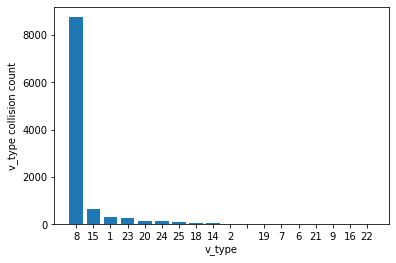

In [8]:
#@title Inputs
x_axis = "v_type" #@param ['a_year', 'a_ref', 'a_District', 'a_type', 'a_veh', 'a_cas', 'a_wkday', 'a_day', 'a_month', 'a_hour', 'a_min', 'a_gd1', 'a_gd2', 'a_ctype', 'a_speed', 'a_jdet', 'a_jcont', 'a_pedhum', 'a_pedphys', 'a_light', 'a_weat', 'a_roadsc', 'a_speccs', 'a_chaz', 'a_scene', 'v_id', 'c_id', 'c_class', 'c_sex', 'c_agegroup', 'c_sever', 'c_loc', 'c_move', 'c_school', 'c_pcv', 'c_pedinj', 'c_vtype', 'v_type', 'v_tow', 'v_man', 'v_loc', 'v_junc', 'v_skid', 'v_hit', 'v_leave', 'v_hitoff', 'v_impact', 'v_sex', 'v_agegroup', 'v_hitr', 'v_forreg', 'a_datetime']
x_count = False #@param {type:"boolean"}
y_axis = "v_type" #@param ['a_year', 'a_ref', 'a_District', 'a_type', 'a_veh', 'a_cas', 'a_wkday', 'a_day', 'a_month', 'a_hour', 'a_min', 'a_gd1', 'a_gd2', 'a_ctype', 'a_speed', 'a_jdet', 'a_jcont', 'a_pedhum', 'a_pedphys', 'a_light', 'a_weat', 'a_roadsc', 'a_speccs', 'a_chaz', 'a_scene', 'v_id', 'c_id', 'c_class', 'c_sex', 'c_agegroup', 'c_sever', 'c_loc', 'c_move', 'c_school', 'c_pcv', 'c_pedinj', 'c_vtype', 'v_type', 'v_tow', 'v_man', 'v_loc', 'v_junc', 'v_skid', 'v_hit', 'v_leave', 'v_hitoff', 'v_impact', 'v_sex', 'v_agegroup', 'v_hitr', 'v_forreg', 'a_datetime']
y_count = True #@param {type:"boolean"}
graph_type = "bar" #@param ["line", "bar", "scatter"]
#@markdown 

#print(list(collisions_edit.columns.values))

# Create a lookup
if x_count:
  x_value = all_2019[x_axis].value_counts()
else:
  x_value = all_2019[x_axis].value_counts().keys()
if y_count:
  y_value = all_2019[y_axis].value_counts()
else:
  y_value = all_2019[y_axis].value_counts().keys()

if graph_type=="bar":
  plt.bar(x_value, y_value)
  if x_count:
    plt.xlabel(x_axis + ' collision count')
  else:
    plt.xlabel(x_axis)
  if y_count:
    plt.ylabel(y_axis + ' collision count')
  else:
    plt.ylabel(y_axis)

if graph_type=="scatter":
  plt.scatter(x_value, y_value)
  if x_count:
    plt.xlabel(x_axis + ' collision count')
  else:
    plt.xlabel(x_axis)
  if y_count:
    plt.ylabel(y_axis + ' collision count')
  else:
    plt.ylabel(y_axis)

if graph_type=="line":
  plt.plot(x_value, y_value)
  if x_count:
    plt.xlabel(x_axis + ' collision count')
  else:
    plt.xlabel(x_axis)
  if y_count:
    plt.ylabel(y_axis + ' collision count')
  else:
    plt.ylabel(y_axis)


**District 2019 Accident Locator**

In [9]:
#@title Collision Map Marker 2019
District = "NEMD" #@param ["BELC", "ARBC", "NEMD", "LISC", "ANTN", "DCST", "MIDU", "ARND", "CCGL", "MEAN", "FERO"] {allow-input: true}
m = folium.Map(location=[54.637676, -6.645536], width=700, height=700, zoom_start=8)

# location=[54.637676,-6.645536]

my_collision_data = collisions_edit[["a_year","a_gd1","a_gd2","a_District"]]

my_collision_data = my_collision_data.loc[my_collision_data["a_District"] == District]

my_collision_data = my_collision_data.loc[my_collision_data["a_year"] == 2019]

my_collision_data = my_collision_data.values.tolist()

jsonfile = f'collisions-2018.geojson'

# jsonfile.dumps()

# folium.GeoJson(
#     jsonfile,
#     name='geojson'
# ).add_to(m)

m

# Supplementary Graphics

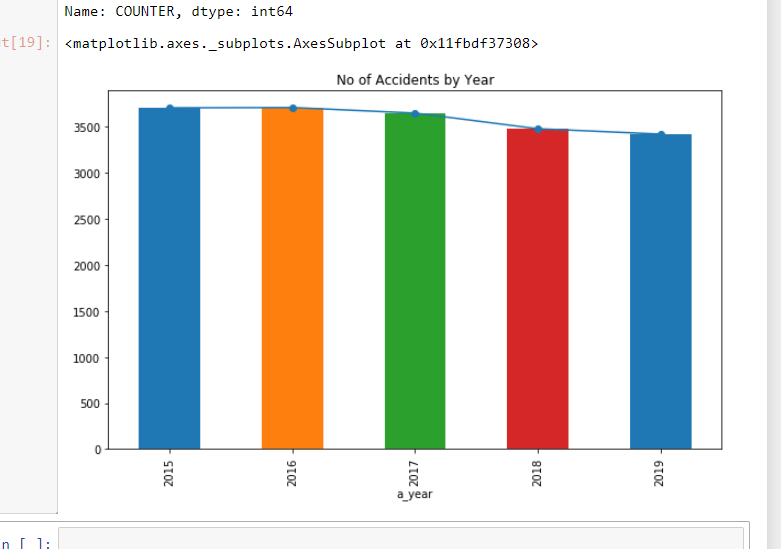



**Speed of road vs Accident Count**
 
Created using District 2019 Accident Locator

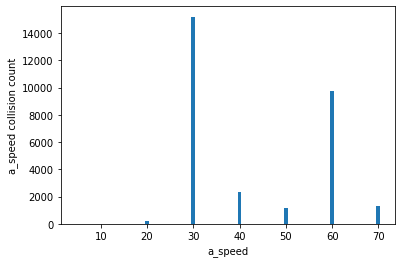

**Vehicle type vs Accident Count**

Created using District 2019 Accident Locator

You can see that cars (8) are by far the most prevelant in accidently.
     Fun fact: were more Bicycle (1) accidents than motorcycle (23) ones.

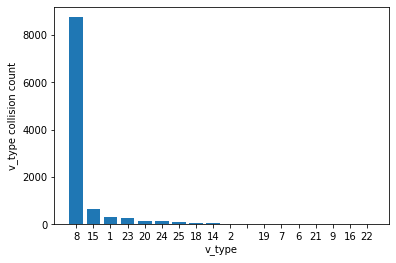

**RTC vs Day of the Week**

Friday is the most prevelant day for RTC occurence throughout the week. Sunday has the lowest RTC frequency with 30% fewer than on Friday.

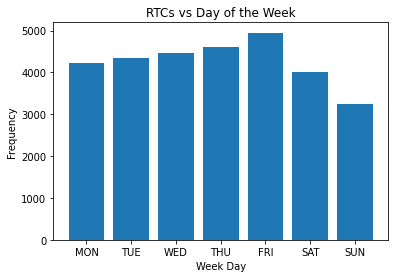

### RTC vs Time of Day

The frequency of RTCs increases sharply between 7-8am. This is presumably through rush hour. The peak time for RTCs is the evening at 5pm with over 3000 between 2015-2019!

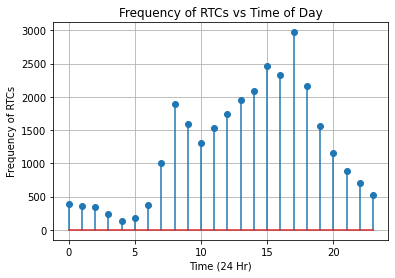